# Artificial Neural Networks 2 - Multi Layer Perceptrons or Feedforward Neural Networks

## This week's task:
## Train a Neural Network to predict the grades of a metal alloy based on a series of parameters

### Description

During the metal manufacturing process, a range of parameters can affect the grade, and therefore the potential uses, of the resulting alloy. Given values for these parameters, we would like to be able to predict the grade of the resulting alloy.

### The dataset

The dataset included in the accompanying `Metal_Grade.csv` file is a slightly modified version of the dataset from this [link](https://www.kaggle.com/esotericazzo/metal-furnace-dataset) and includes 27 factors affecting the quality of manufactured alloys, along with the resulting grade for 620 cases. The file can be visualised with `pandas` as:

In [4]:
import pandas as pd #import pandas module

#pd.set_option('display.max_rows', None) #uncomment this line to view all rows
#pd.set_option('display.max_columns', None) #uncomment this line to view all columns

metalDf = pd.read_csv("Metal_Grade.csv") #read the file containing the data

metalDf #visualise data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,grade
0,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.395874,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.264250,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.395874,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.395874,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.395874,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,-2.526055,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,-0.825098,-0.264250,2.004803,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.395874,...,0.085505,0.233285,-1.080663,-0.684962,-0.406121,-0.687687,0.271886,-0.232472,0.102129,2
616,-0.379487,3.809407,-0.461423,0.409400,1.305455,-0.276144,0.370965,0.090167,0.107958,0.395874,...,0.085505,0.233285,-1.080663,2.248407,-0.332678,-0.687687,0.271886,4.519156,0.102129,2
617,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.395874,...,0.085505,0.233285,-1.080663,-1.023427,1.332042,-0.687687,0.271886,-0.232472,0.102129,2
618,-0.825098,-0.264250,2.004803,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.395874,...,0.085505,0.233285,-1.080663,3.150982,-1.777067,-0.687687,0.271886,-0.232472,0.102129,2


## The SLP with multiple outputs

### Architecture

The first issue that we encounter when trying to apply the SLP to more complicated problems, such as the one described above, is the number of outputs. 

The SLP, as described in the previous lecture, has a single output, which can be converted to binary format by applying an activation function and a threshold. However, this is only suitable for regression with one output, or binary classification.

A way to extend the SLP to more complicated problems, is by simply increasing the number of outputs, as illustrated below for a SLP with 3 inputs:

<br />
<br />

<div>
<img src="./Figures/slp_2a.png" width="600" align="center">
</div>

The above figure introduces an alternative way of drawing neural networks, where:

- An additional "fictitious" input with value 1 is considered.
- The weights corresponding to this input are aquivalent to the biases.

However, very often, this part is ommited, and networks are simply drawn as:

<br />
<br />

<div>
<img src="./Figures/slp_2b.png" width="600" align="center">
</div>

Moreover, notice that:

- Every input is connected to every output, creating a so called fully connected layer
- Weights have two indices:
    + the first is related to the input they are connected to and
    + the second is related to the output.
- Biases also have an index, since a different bias is defined for each output.

This architecture can be directly used for regression with multiple outputs. For classification problems, the outputs can be converted to values representing probabilities of the inputs belonging to each class through the use of a softmax activation function. 

The expression for the softmax function is: $$f\left( \mathbf{x} \right)_i = \dfrac{e^{x_i}}{\Sigma_{j=1}^{n}e^{x_j}}$$ As an example, if the outputs of a MLP for classification using three classes are $y_1=12, y_2 = 16, y_3 = 17$, applying the softmax function will yield: 

In [5]:
import numpy as np

def softmax(x):
    '''Softmax function'''
    return np.exp(x)/np.sum(np.exp(x))

y = np.array([12., 16., 17.])

yProb = softmax(y);

print(yProb)

[0.00490169 0.26762315 0.72747516]


The above can be interpreted as the input having 0.49% probability of belonging to class 1, 26.76% probability of belonging to class 2 and 72.74% probability of belonging to class 3. Very often we are only interested in knowing which class each input belongs to. This can be achieved by just extracting the class with the highest probability. Using numpy, this can be done as:

In [6]:
yClass = np.argmax(yProb) #argmax returns the index of the maximum element of an array
print(yClass)

2


### Mathematical expression

For a general network with $n$ inputs and $m$ outputs, the operations performed by individual elements can be compactly described by the following expression:

$ y_j = f\left( \Sigma_{i=1}^n w_{ij} x_j + b_j \right)$

where:

+ $x_i$ are the inputs, for instance $x_1, x_2, \dots$
+ $y_j$ are the outputs, for instance $y_1, y_2, \dots$
+ $w_{ij}$ is the weight corresponding to input $i$ and output $j$
+ $b_j$ is the bias corresponding to output $j$
+ $f$ is the activation function

The inputs weights, biases, and outputs in the above expression can be written in matrix form as:

$$\mathbf{x} = \left[	
	\begin{array}{c }
    	x_1   \\
     	x_2   \\
        \vdots \\
        x_n  \end{array}\right], \mathbf{W} = \left[	
	\begin{array}{c c c }
    	w_{11} & w_{12} & \dots  & w_{1m} \\
     	w_{21} & w_{22} & \dots  & w_{2m} \\
        \vdots & \vdots & \ddots & \vdots \\
        w_{n1} & w_{n2} & \dots  & w_{nm}\end{array}\right]$$
        
$$\mathbf{b} = \left[	
	\begin{array}{c }
    	b_1   \\
     	b_2   \\
        \vdots \\
        b_m  \end{array}\right], \mathbf{y} = \left[	
	\begin{array}{c }
    	y_1   \\
     	y_2   \\
        \vdots \\
        y_m  \end{array}\right]$$

Then, the mathematical expression describing the SLP can be re-written as:

$$ \mathbf{y}^T = f\left( \mathbf{x}^T \mathbf{W} + \mathbf{b}^T \right) $$

### Example

As an example, consider a set of points in the 2D plane, stored in the accompanying `plane_points_3_classes.txt` and `plane_points_3_classes_labels.txt` files. They points are divided into three classes and can be loaded and visualised as follows:

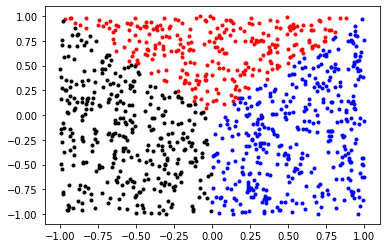

In [7]:
import numpy as np #import numpy
from matplotlib import pyplot as plt #import pyplot

#load points and labels
x3 = np.loadtxt('plane_points_3_classes.txt')
labels3 = np.loadtxt('plane_points_3_classes_labels.txt')

#use np.argwhere to find the indices of the points belonging to each class
class0 = np.argwhere(labels3==0)
class1 = np.argwhere(labels3==1)
class2 = np.argwhere(labels3==2)

#plot the points belonging to each class using a different color
plt.plot(x3[class0,0],x3[class0,1],'.r')
plt.plot(x3[class1,0],x3[class1,1],'.k')
plt.plot(x3[class2,0],x3[class2,1],'.b')

plt.show()

#### Training with tensorflow

Next a SLP with three outputs and a sofmax activation function can be trained to classify the points using `keras`. The syntax is almost identical to the one used in the previous lecture, with three differences:
+ Three outputs are used to match the number of classes
+ The `activation` option is set to `softmax`, to convert the outputs to probabilities
+ `SparseCategoricalEntropy` is used as a loss. This option is suitable for classification with multiple classes, where the labels are inegers corresponding to the class number

In [8]:
import tensorflow as tf #import tensorflow

modelSLP3 = tf.keras.Sequential() #create sequential model

#add layer with 3 outputs and softmax activation
modelSLP3.add(tf.keras.layers.Dense(3,activation='softmax'))

#compile model, SparseCategoricalCrossentropy is used as a loss
modelSLP3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics='accuracy')

#train the model for 100 epochs using the training data
modelSLP3.fit(x3, labels3, epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 1.2647 - accuracy: 0.2890
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 1.2356 - accuracy: 0.3110
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 1.2078 - accuracy: 0.3330
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 1.1808 - accuracy: 0.3590
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 1.1547 - accuracy: 0.3910
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 1.1299 - accuracy: 0.4200
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 1.1058 - accuracy: 0.4450
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0825 - accuracy: 0.4730
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0600 - accuracy: 0.5000
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0382 - accuracy: 0.5280
Epoch 11/

#### Confusion matrix

Results can be visualised through a confusion matrix, using the same commands as shown last week. Notice that the `argmax` function is used to convert predicted probabilities to class labels:

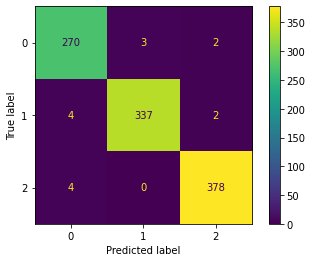

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #import confusion matrix related classes

#use model to predict the labels of the training data as probabilities and convert to integers
labelsPred = modelSLP3.predict(x3)
labelsPred = np.argmax(labelsPred,axis=1)


#create confusion matrix
confusionMatrix3=confusion_matrix(labels3,labelsPred)

#create and show confusion matrix plot
confusionMatrixPlot3 = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix3)
confusionMatrixPlot3.plot()

#### Visualising the decision boundary

To better understand the properties of the created models, it can be helpful to visualise the boundaries between classes, also termed 'decision boundaries'. To this end we will use the following function, which is a slightly modified version of the one provided in [Jon Charests'notebook](https://jonchar.net/notebooks/Artificial-Neural-Network-with-Keras/):

In [10]:
def plotDecisionBoundary(model,limx=[-1,1],limy=[-1,1],resolution=200, colormap = 'RdBu'):
    '''Function to plot the decision boundary of a tensorflow model as a contour plot.
       model is the model, which should have a predict method
       limx, limy are the limits of the plot in x and y
       resolution is the resolution of the plot in terms of the number of points used per direction
       colormap is the colormap to be used for the contour plot
       The function returns a figure and an axis object'''
    
    #create figure
    fig,ax = plt.subplots(1,1)
    
    #create linspaces with the x and y coordinates of the points to be used for the contour plot
    #the limits and resolution are set to the user provided values
    xPoints = np.linspace(limx[0], limx[1], resolution)
    yPoints = np.linspace(limy[0], limy[1], resolution)
    
    #create a meshgrid from the provided
    xx, yy = np.meshgrid(xPoints, yPoints)
    
    #use model to predict the labels of the generated points
    #ravel and c_ are used to bring the coordinates in the correct shape
    modelPred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #check shape of the output, if the output is twodimensional and the size in the second dimension is more than 1
    #then the ouput is assumed to be provided in terms of probabilities and is converted to class indices using the argmax function
    if len(modelPred.shape)==2 and modelPred.shape[1]!=1:
        modelPred = np.argmax(modelPred,axis=1)
    else:
    #if the output is either onedimensional or the second dimension has size one, 
    #then it is assumed to be labels for binary classification and a 0.5 threshold is applied to convert to binary format
        modelPred = modelPred>0.5
    
    #reshape the labels to the shape of xx and yy so that they can be used for a contour plot
    z = modelPred.reshape(xx.shape)

    #create contour plot
    ax.contourf(xx,yy,z,cmap=colormap,alpha=0.5)
    
    #return figure and axis
    return fig,ax

The function can be used to plot the decision boundary of the model, along with the points corresponding to the different classes as:

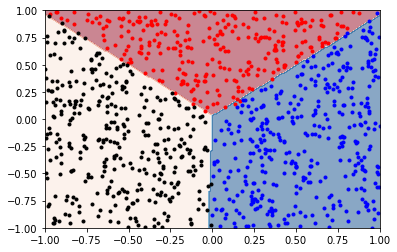

In [11]:
#call provided function, with modelSLP3 as input
#this creates a contour plot with different colors used for each class
fig, ax = plotDecisionBoundary(modelSLP3)

#plot points of each class using a different color
ax.plot(x3[class0,0],x3[class0,1],'.r')
ax.plot(x3[class1,0],x3[class1,1],'.k')
ax.plot(x3[class2,0],x3[class2,1],'.b')

## The Multi Layer Perceptron

### Architecture

The above can be further extended to create more complex architectures termed Multi Layer Perceptrons (MLPs) or feedforward neural networks. These consist of multiple layers, each similar to a SLP, placed one after the other, with the outputs of each previous layer serving as an input for the next. All layers apart from the input and output ones are termed hidden layers. In the following figure, an example of a simple such architecture, consisting of one hidden layer, in addition to the input and output layer, is illustrated:

<br />
<br />

<div>
<img src="./Figures/mlp1.png" width="600" align="center">
</div>

Next the individual elements of a MLP are described in more detail.

#### Inputs

The multi-dimensional inputs $x_1, x_2, \dots, x_n$ of the MLP are similar to the ones of the SLP.

#### Hidden layers

<br />
<br />

<div>
<img src="./Figures/mlp_hidden_layers.png" width="1000" align="center">
    <br/><a align="center">MLP with 1, 2 and 3 hidden layers respectively</a>
</div>

All layers apart from the input and output ones are termed 'hidden'. Each of the hidden layers includes a number of units, each with a set of weights and biases, as well as an activation function. As will be also mentioned later, networks with at least one hidden layer can represent nonlinear functions for regression, or nonlinear boundaries between classes for classification. However, the number of hidden layers used, can affect the properties of the network.

##### Hidden units

<br />
<br />

<div>
<img src="./Figures/mlp_hidden_units.png" width="1000" align="center">
    <br/><a align="center">MLP with 1 hidden layer and 3, 5, and 7 hidden units respectively</a>
</div>

Each hidden layer consists of a number of units, connected to all outputs of the previous layer and acting as inputs for the next layer. The number of units in each hidden layer does not have to be equal to the number of inputs or outputs of the network, however it might affect the properties of the network. 

##### Weights, summing and bias

In each layer of a MLP, the outputs of previous layers are used as input. Similar to the SLP, these inputs are weighted and summed at each unit and biases are added. The process is in general similar to the SLP case, however a larger number of weights and biases needs to be deterined as a result of the larger number of layers and units.

##### Activation

Similar to the SLP, activation is performed after weighting and summing at each layer. Some activation functions used in MLPs are given below:

|     Activation function    |                Expression                    |                                 Graph                             |
|----------------------------|----------------------------------------------|------------------------------------------------------------------|
|Rectified Linear Unit (ReLU)|$$ f\left( x \right) = \max\left(x,0\right) $$|<img src="./Figures/ReLU.png" width="300" align="center"> |
|Softsign                    |$$ f\left( x \right) = \frac{x}{\lvert x \rvert+1} $$|<img src="./Figures/softsign.png" width="300" align="center"> |
|Softplus                    |$$ f\left( x \right) = \log{\left(e^{x}+1 \right)} $$|<img src="./Figures/softplus.png" width="300" align="center"> |

In modern neural networks, the most popular of these is probably the Rectified Linear Unit (ReLU).

#### Output layer

In the output layer, weighting and summing is performed similar to hidden layers.

##### Activation

The activation function used for output layers, might be slightly different than hidden layers. For example:

+ **For regression problems**, a linear activation might be used.
+ **For classification problems**, a softmax activation function can be used to convert each output to a probability of the input belonging to a certain class.

### Mathematical expression

In what follows, we will use superscritps in brackets to denote elements of the $i$th layer of a network, where $i$ assumes a value of 0 for the input layer, 1 for the first hidden layer etc. For instance:

- $f^{\left(2\right)}$ denotes the activation function of the second hidden layer
- $\mathbf{W}^{\left( 1 \right)}$ denotes the matrix of weights of the first hidden layer

Using this notation, the output of the first hidden layer of a MLP will be:

$$\left(\mathbf{y}^{\left( 1 \right)}\right)^T = f^{\left(1 \right)}\left( \mathbf{x}^T \mathbf{W}^{\left( 1 \right)} + \left(\mathbf{b}^{\left( 1 \right)}\right)^T \right)$$

This is subsequently used as input for the second layer, yielding the expression:

$$ \left(\mathbf{y}^{\left( 2 \right)}\right)^T = f^{\left(2 \right)}\left( \left(\mathbf{y}^{\left( 1 \right)}\right)^T \mathbf{W}^{\left( 2 \right)} + \left(\mathbf{b}^{\left( 2 \right)}\right)^T \right) = f^{\left(2 \right)}\left( \left( f^{\left(1 \right)}\left( \mathbf{x}^T \mathbf{W}^{\left( 1 \right)} + \left(\mathbf{b}^{\left( 1 \right)}\right)^T \right) \right)^T \mathbf{W}^{\left( 2 \right)} + \left(\mathbf{b}^{\left( 2 \right)}\right)^T \right)$$

The process is then repeated for all layers of the network.

## Training

### Loss function

As also mentioned in last week's lecture, different loss functions can be used to measure the discrepancy between predicted and actual labels. For classification problems, a commonly used loss, also employed in last week's computer lab, is cross entropy. For a binary classificartion problem, and a set of training labels $y^*_i$ and actual labels $y_i$, cross entropy can be defined as:

$$E = -\dfrac{1}{m} \Sigma_{i=1}^m \left[ y^*_i \log{y_i} + \left(1-y^*_i\right) \log{\left( 1-y_i \right) } \right]$$

where $m$ is the number of training data points. The definition can be extended to higher numebers of classes by considering a probability for each class, as mentioned above, and summing over the number of classes. 

### Back propagation

Weights of MLPs can be updated using extensions of the methods described in the previous lecture for SLPs. An necessary step for most methods, is the computation of the partial derivatives of the loss function with respect to the weights and biases, which can be computed using the chain rule, for instance:

$$\dfrac{\partial E}{\partial w_{ij}} = \Sigma_{k=1}^m\dfrac{\partial E}{\partial y_{k}} \dfrac{\partial y_k}{\partial w_{ij}}$$

where $m$ is the number of training data points.

Since MLPs involve more layers than SLPs the computation of $\dfrac{\partial y_k}{\partial w_{ij}}$ is more involved, requiring the use of the chain rule multiple times. The process of using the chain rule recursively, is termed **back propagation** as oposed to **forward propagation**, which is the process of pasing inputs through the MLP.

## Example

To illustrate the differences between SLPs and SLPc and demonstrate how SLPs can be trained with `Keras`, lets consider a simple example with points in the two dimensional plane. The coordinates and labels ofthe points are stored in the accompanying `plane_points_nal.txt` and `plane_points_nl_labels.txt`. The labels have been assigned based on whether the points are above or below the curve defined by:

$$y = 8x^3-3x$$

Thus, the decision boundary essentially corresponds to that curve.

The points can be loaded and visualised along with the curve as:

In [ ]:
#import numpy and pyplot
import numpy as np
from matplotlib import pyplot as plt

#load points and labels from files
x=np.loadtxt('plane_points_nl.txt')
labels = np.loadtxt('plane_points_nl_labels.txt')

#use np.argwhere to find the indices of the points belonging to each class
class0 = np.argwhere(labels==1)
class1 = np.argwhere(labels==0)

#Generate coordinates of points along the decision boundary
xDB = np.linspace(-0.73,0.73,1000)
yDB = 8*xDB**3-3*xDB

#plot classes using different colors
plt.plot(x[class0,0],x[class0,1],'.b')
plt.plot(x[class1,0],x[class1,1],'.r')

#plot decision boundary
plt.plot(xDB,yDB,'--k',label='Decision boundary')

plt.legend()
plt.show()

In contrast to the cases considered so far, the points are clearly not linearly separable!

### Classification with a SLP

As a first test, we can try to train a SLP for this problem. However, since the data is not linearly separable, we would expect it to perform poorly:

In [ ]:
import tensorflow as tf

#create a sequential model for the slp
modelSLP = tf.keras.Sequential()

#add a dense layer with 1 output and a sigmoid activation function
modelSLP.add(tf.keras.layers.Dense(1,
                                   activation = 'sigmoid'))

#compile model
modelSLP.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics='accuracy')

#train model for 100 epochs using the data from the points 
modelSLP.fit(x, labels, epochs=200)

Results can be visualised in terms of the decision boundary as:

In [ ]:
#plot decision boundary using provided function
fig, ax = plotDecisionBoundary(modelSLP)

#plot data points
ax.plot(x[class0,0],x[class0,1],'.b')
ax.plot(x[class1,0],x[class1,1],'.r')

#plot actual decision boundary
ax.plot(xDB,yDB,'--k',label='Decision boundary')

ax.legend()

We observe that:
+ The SLP performs poorly in terms of the achieved accuracy, regardless of the number of training epochs used
+ The decision boundary for the SLP is a linear approximation of the actual decision boundary, which however is not enough to provide accurate results

### Training a MLP

Next, let's try to train a MLP to improve the above results. Our network will consist of:

+ One hidden layer with 8 hidden units and ReLU activation
+ One output layer with 2 outputs and softmax activartion to convert outputs to probabilities

Using `keras`, this can be accomplished in a very similar way to what was shown so far for the SLP with multiple outputs:

In [ ]:
import tensorflow as tf

#create a sequential model for the mlp
modelMLP = tf.keras.Sequential()

#add a dense layer with 8 outputs and a ReLU activation
modelMLP.add(tf.keras.layers.Dense(8,
                                   activation = 'ReLU'))

#add a dense layer with 2 outputs and softmax activation to convert outputs to probabilities
modelMLP.add(tf.keras.layers.Dense(2,
                                   activation = 'softmax'))

#compile and train model for 100 epochs  
modelMLP.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics='accuracy')

modelMLP.fit(x, labels, epochs=200)

### Visualising the decision boundary

Results can be visualised in terms of the decision boundary as in the SLP case:

In [ ]:
#plot decision boundary using provided function
fig, ax = plotDecisionBoundary(modelMLP)

#plot data points
ax.plot(x[class0,0],x[class0,1],'.b')
ax.plot(x[class1,0],x[class1,1],'.r')

#plot actual decision boundary
ax.plot(xDB,yDB,'--k',label='Decision boundary')

ax.legend()

## Training

Based on the above it is clear that if a large enough number of hidden units and/or hidden layers are used, nonlinear decision boundaries can be approximated. In fact, it can be shown that MLPs with a single hidden layer can approximate almost any function with an arbitrary degree of accuracy, provided that enough hidden units are used. More generally, the ability of the model to represent different functions is termed **capacity**. For MLPs, the model's capacity is affected by parameters such as the number of hidden units and hidden layers, learning rate and number of training epochs.

While the above is very important for the general applicability of neural networks, it does not provide any guidance on how to select the number of hidden units and/or hidden layers for a given problem. In practice, these parameters are determined through experimentation and/or experience. The next subsections introduce some important concepts that are important for the process.

### Generalisation

So far we have only tested the error introduced by SLPs/MLPs when reproducing the training data, i.e. the **training error**. However, the main goal of machine learning algorithms is to make accurate predictions for **previously unseen data**, a property called **generalisation**. The extent to which this goal is achieved can be quantified through the so called **generalisation error** or **test error**, i.e. the expected error for a new, unseen input. A simple way of estimating this error is by computing the error for a new dataset, independent from the training set, termed the **test set**.

### Underfitting/Overfitting

Considering the above, the capacity of machine learning models should be chosen to satisy two requirements:

1. **Small training error:** a high enough capacity should be used to represent the function/decision boundary for a given problem. If the capacity of the model is too low, it will lead to large values for both the training and test error, a phenomenon termed **underfitting**. As an example of underfitting, consider the case of the SLP used for the previous example. In that case, the capacity of the model was too low for the given problem, leading to poor results.
2. **Small discrepancy between the training and test error:** the capacity of the model should not be too high, otherwise the model might 'memorise' every single data point in the data set, rather than learning the required function or decision boundary. This leads to a phenomenon called **overfitting**, where low training errors do not translate to low test/generalisation error. As will be shown in the next example, overfitting can lead to particularly poor results in the presence of noise.

The typical relationship between model capacity and the different types of error is illustrated in the following figure: 
<br />

<div>
<img src="./Figures/overfitting.png" width="600" align="center">
    <br/><a align="center">Relationship between capacity and error. Figure inspired from (Goodfellow et al., 2016).</a>
</div>

A good training strategy, should, in general, aim at determining the optimal capacity for the model, i.e. the one that yields the smallest possible training error, without deteriorating the test error.

### Example

To illustrate how overfitting can lead to poor generalisation, we will consider a set of points similar to the one used in the previous example, but with added noise, which might also be present in real data. The data is included in the `plane_points_noise1.txt` and `plane_points_noise_labels1.txt` files and can be visualised as follows:

In [ ]:
xOF=np.loadtxt('plane_points_noise.txt')
labelsOF = np.loadtxt('plane_points_noise_labels.txt')

class0OF = np.argwhere(labelsOF==1)
class1OF = np.argwhere(labelsOF==0)

plt.plot(xOF[class0OF,0],xOF[class0OF,1],'.b')
plt.plot(xOF[class1OF,0],xOF[class1OF,1],'.r')
plt.plot(xDB,yDB,'--k',label='Decision boundary')

plt.legend()
plt.show()

As a first step, we will split the data into a training and test set. This can be done automatically, using the `train_test_split` function from the `sklearn` package. The function requires, apart from the initial datapoints and labels, the percentage of data to be used for the training set. As output, it returns two different sets of datapoints and labels that can be used for training and testing:

In [ ]:
from sklearn.model_selection import train_test_split

xTrain, xTest, labelsTrain, labelsTest = train_test_split(xOF,labelsOF, train_size=0.5)

Next, we will employ a model with very high capacity to reduce the training error as much as possible. To this end, we will create a model with 4 hidden layers consisting of 100 hidden units each and we will train for a very high number of epochs (1000):

In [ ]:
import tensorflow as tf

modelOF = tf.keras.Sequential()


modelOF.add(tf.keras.layers.Dense(100,
                                  activation = 'relu'))

modelOF.add(tf.keras.layers.Dense(100,
                                  activation = 'relu'))

modelOF.add(tf.keras.layers.Dense(100,
                                  activation = 'relu'))

modelOF.add(tf.keras.layers.Dense(100,
                                  activation = 'relu'))

modelOF.add(tf.keras.layers.Dense(2,
                                  activation = 'softmax'))

modelOF.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics='accuracy')


modelOF.fit(xTrain, 
            labelsTrain, 
            epochs=1000)

As seen above, a very good training error can be obtained, with accuracy in the training set exceeding 90%. However, this accuracy does not necessarily translate to good generalisation. To illustrate this, we can evaluate the loss and accuracy over the test set, using the evaluate method of the model object:

In [ ]:
testLoss, testAcc = modelOF.evaluate(xTest,  labelsTest)

As seen above, the test accuracy is significantly lower than the training error. Some further insight can be obtained by plotting the decision boundary for the model:

In [ ]:
fig, ax = plotDecisionBoundary(modelOF)

class0Train = np.argwhere(labelsTrain==1)
class1Train = np.argwhere(labelsTrain==0)

ax.plot(xTrain[class0Train,0],xTrain[class0Train,1],'.b')
ax.plot(xTrain[class1Train,0],xTrain[class1Train,1],'.r')
ax.plot(xDB,yDB,'--k',label='Decision boundary')

ax.legend()

As seen above, the MLP has essentially memorised almost every single point in the training set, including the noise, rather than learning the decision boundary.

### Hyperparameter tuning

In order to avoid overfitting, hyperparameters, such as the number of hidden layers, should be selected to minimise the generalisation error, rather than the training error. However, the test error cannot be directly used to guide the process since it might bias the model. To avoid this, a third data set is typically introduced, termed the **validation set**, based on which hyperparameters are selected.Then, hyperparameters can be determined either manually, or in an automated way, based on a process similar to the following:

+ Divide available data into test, validation and training data sets.
+ Define a set of possible values for all hyperparameters to be determined. For instance, possible values for the number of hidden units might be: $[10, 20, 50, 100, 200, 500, 1000]$.
+ For each possible combination of parameters:
    + Create and train a model.
    + Evaluate the error of this model over the validation set.
    + For the first model: save the model and resulting error as the optimal model
    + For every subsequent model: if the error is smaller than the optimal model, replace the optimal with the current model.
+ Once all potential combinations have been tested, evaluate the error of the optimal model over the test set.

### Example

To illustrate the above process, consider the dataset from the previous example. First we further split the training set into training and validation sets:

In [ ]:
from sklearn.model_selection import train_test_split

xTrain, xVal, labelsTrain, labelsVal = train_test_split(xTrain,labelsTrain, train_size=0.6)

Next, we specify the sets of possible values for the model hyperparameters. In this case, we will only modify the number of hidden units for all hidden layers:

In [ ]:
hiddenUnits = [2,5,10,20,50,100]

The sets of hidden units can be looped, with a model created and trained for each parameter value:

In [ ]:
#loop list with possible numbers of hidden units
for units in hiddenUnits:
    #create model
    model = tf.keras.Sequential()

    #add 4 layers with different numbers of hidden units
    model.add(tf.keras.layers.Dense(units,
                                      activation = 'relu'))
    model.add(tf.keras.layers.Dense(units,
                                      activation = 'relu'))
    model.add(tf.keras.layers.Dense(units,
                                      activation = 'relu'))
    model.add(tf.keras.layers.Dense(units,
                                      activation = 'relu'))

    #add final dense layer with softmax activation
    model.add(tf.keras.layers.Dense(2,
                                    activation = 'softmax'))

    #compile and fit model for training set
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics='accuracy')

    model.fit(xTrain, 
                labelsTrain, 
                epochs=1000)
    
    #evaluate model for validation set
    lossVal, accVal = model.evaluate(xVal,  labelsVal)
    
    if units==hiddenUnits[0]:
        #if this is the first model tested, save model, error, and accuracy
        modelOpt=model
        lossOpt = lossVal
        accOpt = accVal
        unitsOpt = units
    else:
        #for every subsequent model check accuracy, if higher than current optimal model then replace optimal
        if accVal>accOpt:
            modelOpt=model
            lossOpt = lossVal
            accOpt = accVal
            unitsOpt = units

#print details of optimal model
print('Best loss over test set: ', lossOpt)
print('Best accuracy over validation set: ', accOpt)
print('Number of units selected: ', unitsOpt)

The selected number of hidden layers is much smaller than the original model! The performance of the optimal model over the test set can be evaluated next:

In [ ]:
lossTest, accTest = modelOpt.evaluate(xTest,  labelsTest)

The model achieves a smaller discrepancy between training and test error.

Also, the decision boundary for the new model can be plotted as:

In [ ]:
fig, ax = plotDecisionBoundary(modelOpt)

#find indices of 
class0Train = np.argwhere(labelsTrain==1)
class1Train = np.argwhere(labelsTrain==0)

#plot data points, line used in first example, and line obtained after training
ax.plot(xTrain[class0Train,0],xTrain[class0Train,1],'.b')
ax.plot(xTrain[class1Train,0],xTrain[class1Train,1],'.r')
ax.plot(xDB,yDB,'--k',label='Decision boundary')

ax.legend()

It can be clearly seen that, despite the noisy data, the optimal model leads to a much smoother decision boundary, closer to the initial one.

### Regularisation/Early stopping

A variety of additional strategies can be employed to improve the generalisation error of MLPs and are collectively refered to as **regularisation** methods. In general, these methods introduce modifications, for instance in the loss function of training process, to improve the test error without necessarily altering the capacity of the model.

While several such strategies are available, we will only describe one of the most commonly used for neural networks, named **early stopping**. The strategy is based on the observation that, during a typical training process, the training error will constantly decrease, while the validation error will follow a U shape, initially decreasing and increasing again after a certain point, as illustrated in the following figure:

<div>
<img src="./Figures/training_validation_error.png" width="600" align="center">
    <br/><a align="center">Training and validation error during training. Figure taken from (Goodfellow et al., 2016).</a>
</div>

Based on that, the process should ideally be stopped at the point where the minimum validation error is reached. This can be accomplished by monitoring the validation error during training and terminating the process once an increase is observed for a few consecutive epochs. Then the weights achieved at the minimum value can be restored leading to an optimal model.

### Example

To illustrate the effectiveness of early stopping, as well as how it can be implemented with `keras`, we will consider the previous example, with the same training, validation, testing set splits. The first modification required, is the definition of an early stopping callback. The following options are selected:

+ The `monitor` parameter is set to `val_loss` to use the validation error as an early stopping criterion.
+ The `patience` parameter is given a value of 10, meaning that if the error in the validation set is not improved after 10 consecutive epochs, training will stop.
+ The `restore_best_weights` parameter is set to `True` to use the best weights achieved during training, rather than the last ones obtained

In [ ]:
import tensorflow as tf

#define Early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights=True)

In order to monitor the training and validation error, an additional class is imported from the [`livelossplot`](https://p.migdal.pl/livelossplot/#installation) module. The module does not come preinstalled with Anaconda, therefore it has to be installed by running the following command in an Anaconda (Windows) or regular (Mac) command line:

```
pip install livelossplot
```

Then, the required class, named `PlotLossesKeras` can be imported as:

In [ ]:
from livelossplot import PlotLossesKeras

The model can be created and compiled in the same way as the one used to demonstrate overfitting:

In [ ]:
modelES = tf.keras.Sequential()


modelES.add(tf.keras.layers.Dense(100,
                                  activation = 'relu'))

modelES.add(tf.keras.layers.Dense(100,
                                  activation = 'relu'))

modelES.add(tf.keras.layers.Dense(1000,
                                  activation = 'relu'))

modelES.add(tf.keras.layers.Dense(100,
                                  activation = 'relu'))

modelES.add(tf.keras.layers.Dense(2,
                                  activation = 'softmax'))

modelES.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics='accuracy')

Finally, the model can be fitted using the `fit` method. Notice that the following additional arguments are passed:

+ The optional argument `validation_data` is used to provide the validation data and labels.
+ The `callbacks` argument is used to pass the imported `PlotLossesKeras` object and the previously defined `callback` object.

In [ ]:
modelES.fit(xTrain, 
            labelsTrain,
            validation_data=(xVal, labelsVal),
            callbacks=[PlotLossesKeras(), callback], 
            epochs=1000)

The `PlotLossesKeras` callback allows to monitor the training and validation errors in real time, while, through the use of early stopping, the difference between validation and training error can be decreased. Notice that this is achieved despite the fact that the capacity of the model used is probably to high for the current problem.

The error and accuracy for the test set can be evaluated as:

In [ ]:
lossTest, accTest = modelES.evaluate(xTest,  labelsTest)

The decision boundary for the new model can be visualised as:

In [ ]:
fig, ax = plotDecisionBoundary(modelES)

ax.plot(xOF[class0OF,0],xOF[class0OF,1],'.b')
ax.plot(xOF[class1OF,0],xOF[class1OF,1],'.r')
ax.plot(xDB,yDB,'--k',label='Decision boundary')

ax.legend()

Again a smoother decision boundary can be obtained despite the presence of noise. Again notice that this is possible despite the fact that the capacity of the model used is probably too high.

## Summary

### Key points

In this lecture:

+ We presented in detail the structure and training process for MLPs.
+ We discussed about training MLPs and potential problems such as overfitting.
+ We demonstrated some strategies for training MLPs and avoiding overfitting

The above should allow us to solve today's problem!

### Resources/Further reading

+ [`keras` website](https://keras.io/)
+ I. Goodfellow, Y. Bengio and A. Courville. *Deep learning*. MIT press, 2016 (library 006.31 GOO)
+ D.W. Patterson. *Artificial Neural Networks: Theory and Applications*. Prentice Hall, 1996 (library 006.3 PAT)
+ K. Mehrotra, C.K. Mohan, S. Ranka. *Elements of Artificial neural networks*, MIT Press, 1997 (library 001.535 MEH)

## Solving today's problem

Today's problem is a classification problem with 27 inputs and 5 classes (grade 0-4). As a first step towards it, the data should be converted to `numpy` arrays and normalised as:

In [ ]:
import numpy as np

#convert data and labels (metal grades) to numpy arrays
dataMetal = metalDf.iloc[:,:-1].to_numpy()
labelsMetal = metalDf.iloc[:,-1].to_numpy()

#normalise data using the maximum value of each column
dataMetal = dataMetal/dataMetal.max(axis=0)

Next we can split the data into training and testing sets using a 80%-20% split and, subsequently, further split the training data into training and validation using a 80%-20% split:

A MLP can be created to classify the data and early stopping can be employed to avoid overfitting. The number of inputs and outputs for the network should be 27 and 5 respectively, while a single hidden layer can be used. Different numbers of hidden units, for instance 50, 100, 200 can be tested manually or automatically:

The model error and accuracy should be evaluated for the test set: 

Finally, the labels of the test set can be predicted and visualised using a confusion matrix:

## Additional practice

For some additional practice, in the cells below, the full iris data set is loaded and normalised. 

In [ ]:
import pandas as pd #import pandas module

#pd.set_option('display.max_rows', None) #uncomment this line to view full dataset

irisDf = pd.read_csv("iris_full.csv") #read the file containing the data

irisDf #visualise data

In [ ]:
irisData=irisDf[['sepal length','sepal width','petal length','petal width']].to_numpy()
irisData = irisData/irisData.max(axis=0)

irisLabels = np.zeros(150)
irisLabels[50:100]=1
irisLabels[100:]=2

Similar to what was shown above, the dataset can be split into training, validation and testing parts and a MLP can be trained to classify the data: